In [1]:
from typing import Callable
import numpy as np
import scipy
from scipy.special import legendre
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider, Layout

## Basis functions

In [2]:
a = -np.pi
b = np.pi
r_grid = np.linspace(a, b, 300)  # radial grid defined on the interval [a, b]

In [3]:
nb_basis_functions = 6  # for plotting the legendre polynomials in this section

### Legendre polynomials

In [4]:
def legendre_polynomial(
    n: int, a: float, b: float
) -> Callable[[np.ndarray], np.ndarray]:
    """
    Returns a function that copmutes the Legendre polynomials realigned
    to the range [a, b].

    :param n: Specifies which basis function to compute.
    :param a: The start of the interval to which the basis functions are realigned.
    :param b: The end of the interval to which the basis functions are realigned.

    References
    ----------
    https://en.wikipedia.org/wiki/Legendre_polynomials
    """
    legendre_n = legendre(n)
    # normalization retrieved from https://math.stackexchange.com/a/4425578
    norm = np.sqrt(1 / (2 * n + 1))
    return lambda r: legendre_n(2 * (r - a) / (b - a) - 1) / np.sqrt(b - a) / norm

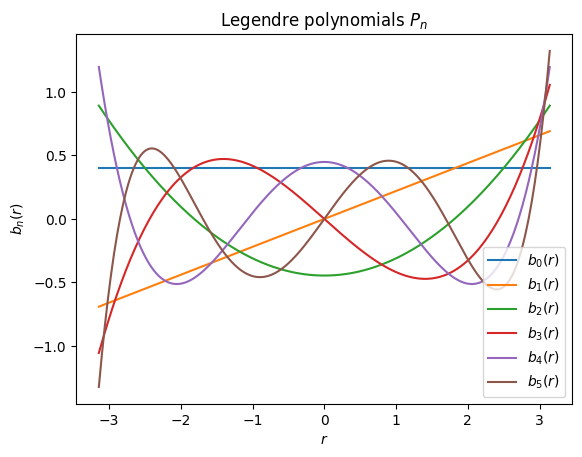

In [5]:
for n in range(nb_basis_functions):
    plt.plot(
        r_grid, legendre_polynomial(n, a, b)(r_grid), label="$b_{" + str(n) + "}(r)$"
    )
plt.title("Legendre polynomials $P_n$")
plt.xlabel("$r$")
plt.ylabel("$b_n(r)$")
plt.legend()
plt.show()
plt.close()

### Fourier series

In [6]:
def fourier_series(n: int, a: float, b: float) -> Callable[[np.ndarray], np.ndarray]:
    """
    Returns a function that copmutes the Fourier basis realigned to the range [a, b].

    :param n: Specifies which basis function to compute.
    :param a: The start of the interval to which the basis functions are realigned.
    :param b: The end of the interval to which the basis functions are realigned.

    References
    ----------
    https://en.wikipedia.org/wiki/Fourier_series#Sine-cosine_form
    """
    if n == 0:
        return lambda r: np.ones_like(r) / np.sqrt((b - a))
    elif n % 2 == 1:
        n = n + 1
        return lambda r: np.cos(2 * np.pi * (n // 2) * (r - a) / (b - a)) / np.sqrt(
            (b - a) / 2
        )
    else:
        return lambda r: np.sin(2 * np.pi * (n // 2) * (r - a) / (b - a)) / np.sqrt(
            (b - a) / 2
        )

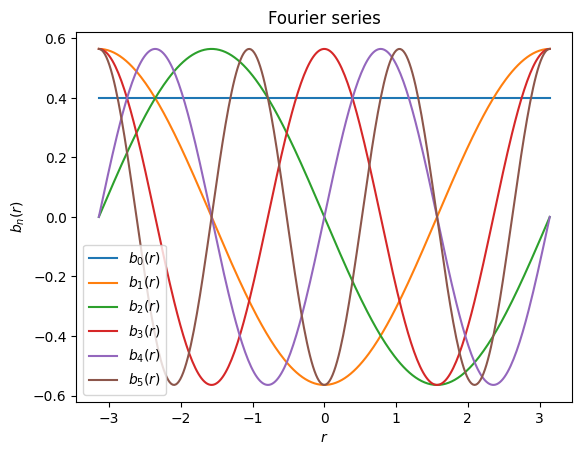

In [7]:
for n in range(nb_basis_functions):
    plt.plot(r_grid, fourier_series(n, a, b)(r_grid), label=f"$b_{n}(r)$")

plt.title("Fourier series")
plt.xlabel("$r$")
plt.ylabel("$b_n(r)$")
plt.legend()
plt.show()
plt.close()

### Schauder basis

In [8]:
def schauder(
    n: int, nb_basis_functions: int, a: float, b: float
) -> Callable[[np.ndarray], np.ndarray]:
    """
    This is a subset of functions used in the construction of the
    Franklin system which is a Schauder basis of $L_p$ for
    $1 < p < \\infty$ and in particular an ONB of L_2([0,1])
    The Franklin system itself can be obtained by Gram-Schmidt
    orthogonalization of the Faber-Schauder basis on C[0,1]

    :param n: Specifies which basis function to compute.
    :param nb_basis_functions: The maximum number of basis,
        i.e. the dimension of the basis.
    :param a: The start of the interval to which the basis functions are realigned.
    :param b: The end of the interval to which the basis functions are realigned.
    """

    def fpeak0(x):
        # peaked function on [-1,1]
        return -2 * np.abs(x) + 2

    def fpeak1(x):
        # scale f0 to [0,1]
        return fpeak0(2 * x - 1)

    def fpeak(x, a, b):
        # peak function on [a,b]
        return np.where(x > a, np.where(x < b, fpeak1((x - a) / (b - a)), 0), 0)

    bounds = np.linspace(a, b, nb_basis_functions + 1)
    return lambda r: fpeak(r, bounds[n], bounds[n + 1]) * np.sqrt(
        0.75 * nb_basis_functions / (b - a)
    )

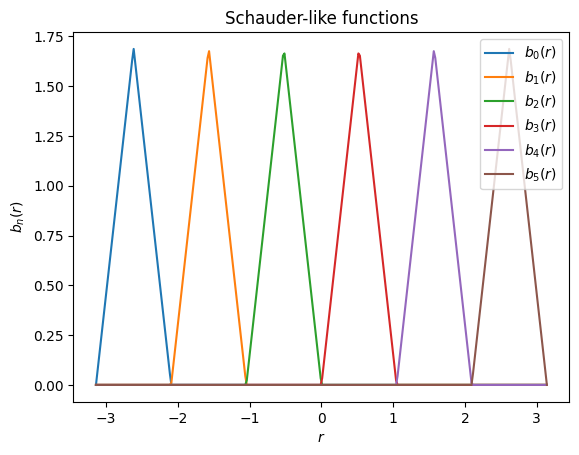

In [9]:
for n in range(nb_basis_functions):
    plt.plot(r_grid, schauder(n, nb_basis_functions, a, b)(r_grid), label=f"$b_{n}(r)$")

plt.title("Schauder-like functions")
plt.xlabel("$r$")
plt.ylabel("$b_n(r)$")
plt.legend()
plt.show()
plt.close()

## Target functions

In [10]:
def normalize_function(
    f: Callable[[np.ndarray], np.ndarray], a: float, b: float
) -> Callable[[np.ndarray], np.ndarray]:
    """
    Normalizes a function on the interval [a, b]

    :param f: The function that should be normalized.
    :param a: Beginning of the interval to integrate.
    :param b: End of the interval to integrate.
    """
    norm = np.sqrt(scipy.integrate.quad(lambda r: f(r) ** 2, a, b)[0])
    return lambda r: f(r) / norm


def gaussian(r_i: float, sigma: float = 0.3) -> Callable[[np.ndarray], np.ndarray]:
    """
    Returns a Gaussian function for a set of parameters

    .. math:

        exp(-0.5*(r-r_i)/σ^2)/(σ*sqrt(2π))

    :param r_i: The center of Gaussian function.
    :param sigma: The sigma of the Gaussian function.
    """
    return lambda r: np.exp(-0.5 * ((r - r_i) / sigma) ** 2) / (
        sigma * np.sqrt(2 * np.pi)
    )

### Gaussian probality density function centered at the origin

In [11]:
def gaussian_origin(sigma: float = 0.3) -> Callable[[np.ndarray], np.ndarray]:
    """
    Returns a function that computes a Gaussian function centered at the origin.

    :param sigma: The sigma of the Gaussian function.
    """
    gaussian_f = gaussian(0, sigma)
    return lambda r: gaussian_f(r)

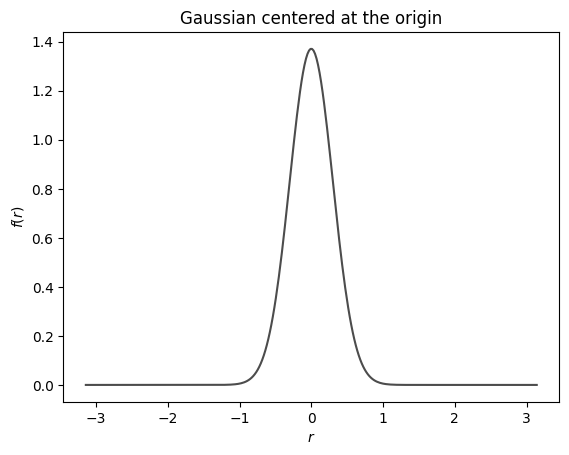

In [12]:
# We limit our function on a grid to the range [0, 6]
gaussian_origin_f = gaussian_origin()
gaussian_origin_f = normalize_function(gaussian_origin_f, a, b)
plt.plot(r_grid, gaussian_origin_f(r_grid), color="k", alpha=0.7)
plt.title("Gaussian centered at the origin")
plt.xlabel("$r$")
plt.ylabel("$f(r)$")
plt.show()
plt.close()

### Gaussian probablity density function centered at the boundary

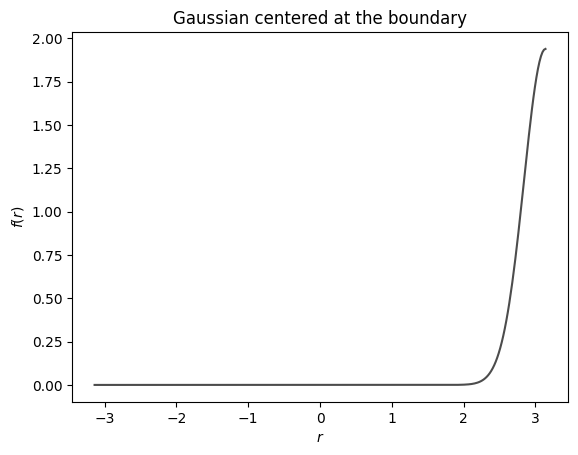

In [13]:
def gaussian_boundary(
    a: float, b: float, sigma: float = 0.3
) -> Callable[[np.ndarray], np.ndarray]:
    """
    Returns a function that computes a Gaussian function centered
    at the end of the interval [a, b].

    :param a: The start of the interval.
    :param b: The end of the interval.
    :param sigma: The sigma of the Gaussian function.
    """
    gaussian_f = gaussian(b, sigma)
    return lambda r: gaussian_f(r)


gaussian_boundary_f = gaussian_boundary(a, b)
gaussian_boundary_f = normalize_function(gaussian_boundary_f, a, b)
plt.plot(r_grid, gaussian_boundary_f(r_grid), color="k", alpha=0.7)
plt.title("Gaussian centered at the boundary")
plt.xlabel("$r$")
plt.ylabel("$f(r)$")
plt.show()
plt.close()

### Sawtooth function

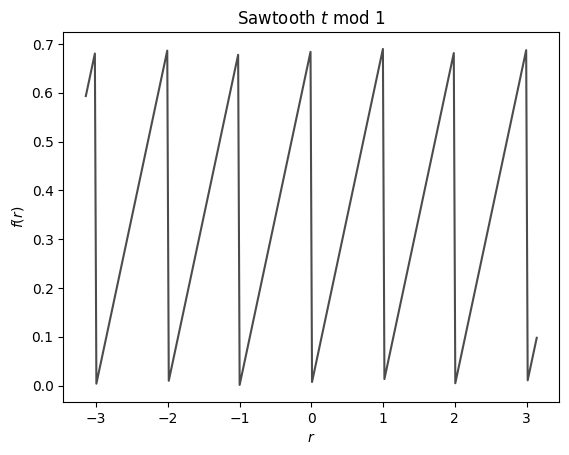

In [14]:
def sawtooth(a: float, b: float):
    """
    Returns a function that computes the sawtooth function realigned
    to the interval [a, b].

    :param a: The start of the interval.
    :param b: The end of the interval.
    """
    return lambda r: (r % 1) * np.sqrt(3) / np.sqrt(b - a)


sawtooth_f = sawtooth(a, b)
plt.plot(r_grid, sawtooth_f(r_grid), color="k", alpha=0.7)
plt.title("Sawtooth $t$ mod $1$")
plt.xlabel("$r$")
plt.ylabel("$f(r)$")
plt.show()
plt.close()

## Basis expansion and reconstruction

The basis expansion coefficients for an orthonormal basis can be expressed as
$$ c_n = \int_\mathbb{R}\mathrm{d}r\,b_n(r)f(r)$$

For an orthonormal complete basis $\{b_n\}_n$ we can than reconstruct the target function $f$ in the limit of the number of basis functions
$$ \sum_n c_n b_n(r) =_{n \rightarrow\infty} f(r)$$

### Approximation error of the basis reconstruction

Looking at the function gives use already an idea about how suitable a basis is to reconstruct a function. Now we more rigorous quantify this intuition by computing the approximation error on the interval $[-π,π]$. 
$$ \ell(\{b_n\}_{n=0}^M, f) = \int_{-π}^{π}\mathrm{d}r\,(\sum_n^M c_n b_n(r) - f(r))^2$$ 
An compare the results for different type of basis funcitons $\{b_n\}_n^M$ and target functions $f$ with respect to the total number of basis functions $M+1$. In principle we can use any other loss function (for example L1 norm). For the sake of this exercise, the differences between loss functions is not relevant and we only chose the mean squared error as it is widely used.

In [15]:
NB_GRID_POINTS = 500
INTEGRATION_GRID = np.linspace(a, b, NB_GRID_POINTS)
GRID_DX = (b - a) / NB_GRID_POINTS


def basis_function_expansion(
    basis_f: Callable[[np.ndarray], np.ndarray],
    target_f: Callable[[np.ndarray], np.ndarray],
    a: float,
    b: float,
) -> float:
    """
    Expands a basis function on a target function on the interval [a, b]
    and returns the basis expansion coefficient.

    :param basis_f: Basis function.
    :param target_f: Target function.
    :param a: Beginning of the interval to integrate on
    :param b: End of the interval to integrate on.
    """

    norm_target = np.sqrt(
        scipy.integrate.simpson(
            target_f(INTEGRATION_GRID) ** 2, x=INTEGRATION_GRID, dx=GRID_DX
        )
    )
    norm_basis = np.sqrt(
        scipy.integrate.simpson(
            basis_f(INTEGRATION_GRID) ** 2, x=INTEGRATION_GRID, dx=GRID_DX
        )
    )
    return scipy.integrate.simpson(
        basis_f(INTEGRATION_GRID)
        * target_f(INTEGRATION_GRID)
        / (norm_basis * norm_target),
        x=INTEGRATION_GRID,
        dx=GRID_DX,
    )


def basis_reconstruction(
    basis: Callable[[int], Callable[[np.ndarray], np.ndarray]],
    target_f: Callable[[np.ndarray], np.ndarray],
    nb_basis_functions: int,
    a: float,
    b: float,
) -> Callable[[np.ndarray], np.ndarray]:
    """
    Expand function on basis on the interval [a, b]

    Expands a basis on a target function on the interval [a, b]
    and returns the basis reconstruction in form of a lambda
    function that multiplies the basis functions with the basis
    expansion coefficients.

    :param basis_f: Basis function.
    :param target_f: Target function.
    :param nb_basis_functions: Number of basis functions to use for reconstruction.
    :param a: Beginning of the interval to integrate on
    :param b: End of the interval to integrate on.
    """
    expansion_coeffs = np.zeros(nb_basis_functions)
    for n in range(nb_basis_functions):
        expansion_coeffs[n] = basis_function_expansion(basis(n), target_f, a, b)

    return lambda r: np.sum(
        [
            expansion_coeffs[n] * basis(n)(r)  # TODO add norm here
            for n in range(nb_basis_functions)
        ],
        axis=0,
    )


def squared_error(
    f_1: Callable[[np.ndarray], np.ndarray],
    f_2: Callable[[np.ndarray], np.ndarray],
    a: float,
    b: float,
) -> float:
    """
    Computes the squared error between the two functions integrated
    on the interval [a, b].

    .. math:

        \\int_a^b\\mathrm{d}r\\, (f_1(r) - f_2(r))^2

    :param f_1: First function
    :param f_2: Second function.
    :param a: beginning of the interval to integrate
    :param b: end of the interval to integrate
    """
    return scipy.integrate.simpson(
        (f_1(INTEGRATION_GRID) - f_2(INTEGRATION_GRID)) ** 2,
        x=INTEGRATION_GRID,
        dx=GRID_DX,
    )

In [17]:
nbs_basis_functions = np.arange(1, 26)

basis_function_options = ["Legendre", "Fourier", "Schauder"]
target_function_options = ["Gaussian at origin", "Gaussian at boundary", "Sawtooth"]

basis_reconstructions = {}
basis_expansion_error = {}
basis_f_eval_on_grid = {}
target_f_eval_on_grid = {}
for basis in basis_function_options:
    if basis == "Legendre":
        basis_f = legendre_polynomial
    elif basis == "Schauder":
        basis_f = lambda n, a, b: schauder(n, max(nbs_basis_functions) + 1, a, b)
    elif basis == "Fourier":
        basis_f = fourier_series
    else:
        raise ValueError(f"basis {basis!r} not known.")

    basis_reconstructions[basis] = {}
    basis_expansion_error[basis] = {}
    basis_f_eval_on_grid[basis] = {}
    target_f_eval_on_grid[basis] = {}
    for target in target_function_options:
        if target == "Gaussian at origin":
            target_f = gaussian_origin_f
        elif target == "Gaussian at boundary":
            target_f = gaussian_boundary_f
        elif target == "Sawtooth":
            target_f = sawtooth_f
        else:
            raise ValueError(f"target function {target_f} is not supported.")

        basis_reconstructions[basis][target] = {}
        basis_expansion_error[basis][target] = {}
        basis_f_eval_on_grid[basis][target] = {}
        target_f_eval_on_grid[basis][target] = target_f(r_grid)

        for nb_basis_functions in nbs_basis_functions:
            basis_reconstructions_f = basis_reconstruction(
                lambda n: basis_f(n, a, b), target_f, nb_basis_functions, a, b
            )

            basis_expansion_error[basis][target][nb_basis_functions] = squared_error(
                basis_reconstructions_f, target_f, a, b
            )
            basis_reconstructions[basis][target][nb_basis_functions] = (
                basis_reconstructions_f(r_grid)
            )
            basis_f_eval_on_grid[basis][target][nb_basis_functions - 1] = basis_f(
                nb_basis_functions - 1, a, b
            )(r_grid)

In [21]:
def basis_reconstruction_exercise(nb_basis_functions, basis, target):
    global nbs_basis_functions, r_grid, a, b
    global legendre_polynomial, schauder, fourier_series
    global gaussian_origin_f, gaussian_boundary_f, sawtooth_f
    global basis_expansion_error, basis_reconstruction
    global target_f_eval_on_grid, basis_f_eval_on_grid

    if target == "Gaussian at origin":
        target_f = gaussian_origin_f
    elif target == "Gaussian at boundary":
        target_f = gaussian_boundary_f
    elif target == "Sawtooth":
        target_f = sawtooth_f
    else:
        raise ValueError(f"Target function {target_f} is not supported.")

    fig = plt.figure(figsize=(13, 8))
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])

    fig.suptitle("Target function reconstruction by basis expansion")

    for n in range(nb_basis_functions):
        ax1.plot(
            r_grid,
            basis_f_eval_on_grid[basis][target][n],
            label="$b_{" + str(n) + "}(r)$",
        )

    ax1.set_title(f"{basis} basis functions")
    ax1.set_xlabel("$r$")
    ax1.set_ylabel("$b_n(r)$")
    if basis == "Legendre":
        ax1.set_ylim(-1.0, 1.0)
    elif basis == "Schauder":
        ax1.set_ylim(-0.05, 3.5)
    elif basis == "Fourier":
        ax1.set_ylim(-0.75, 0.75)

    ax1.legend(ncol=4)

    ax2.plot(
        r_grid,
        basis_reconstructions[basis][target][nb_basis_functions],
        label="$\\sum_{n=0}^{" + str(nb_basis_functions - 1) + "}c_nb_n(r)$",
    )
    ax2.plot(
        r_grid,
        target_f_eval_on_grid[basis][target],
        alpha=0.7,
        color="k",
        label="$f(r)$",
    )
    ax2.set_title(f"{basis} basis reconstruction of {target}")
    ax2.set_xlabel("$r$")
    ax2.set_ylabel("$f(r)$")
    if target == "Gaussian at origin":
        ax2.set_ylim(-0.2, 1.5)
    elif target == "Gaussian at boundary":
        ax2.set_ylim(-0.2, 2.0)
    elif target == "Sawtooth":
        ax2.set_ylim(-0.05, 1.0)
    ax2.legend()

    selected_error = basis_expansion_error[basis][target]
    for basis_expansion_error_values in basis_expansion_error.values():
        ax3.plot(
            nbs_basis_functions, basis_expansion_error_values[target].values(), lw=2
        )
    ax3.plot(
        nbs_basis_functions, selected_error.values(), color="yellow", alpha=0.2, lw=10
    )
    ax3.scatter(
        [nb_basis_functions], [selected_error[nb_basis_functions]], color="red", s=50
    )
    ax3.set_title(f"Reconstruction error of {target} using {basis} basis")
    ax3.set_xticks(nbs_basis_functions[::2])
    ax3.set_xlabel("number of basis functions")
    ax3.set_ylabel(
        "Error $\\int_{-π}^{π} \\mathrm{d}r\\, (f(r)-\\sum_n^{n_{basis}} c_n b_n(r))^2$"
    )
    ax3.set_ylim(-0.05, 1.05)
    plt.show()


interactive_plot = interactive(
    basis_reconstruction_exercise,
    nb_basis_functions=IntSlider(
        min=min(nbs_basis_functions),
        max=max(nbs_basis_functions),
        description="nb basis functions",
        style={"description_width": "initial", "width": "800px"},
        layout=Layout(width="400px"),
    ),
    basis=basis_function_options,
    target=target_function_options,
)
interactive_plot

interactive(children=(IntSlider(value=1, description='nb basis functions', layout=Layout(width='400px'), max=2…